In [1]:
# Neezcha Dinman
# ICS 483
# Homework 3

In [2]:
# imports

import numpy
import scipy
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.filters import sobel
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
####   1   ####

In [4]:
# 1a 
# write your own gaussian function
# scaled_images = my_gaussian_pyramid(image, scale_factor,n_scales, sigma)

In [5]:
# compute the maximum number of scales (max_scales) given the image size and the downscale factor, 
# and set the number of scales of the pyramid as min(max_scales, n_scals). 
# That is, the number of scales in the output pyramid becomes
# max_scales if n_scales > max_scales.

#  gaussian_filter function in the SciPy library for smoothing. However, you
# should implement your own version of down-sampling with given scaling factor.

In [6]:
def scaled_images (image, *args, **kwargs):
    #default values
    scale_factor = kwargs.get('scale_factor', 2)
    n_scales = kwargs.get('n_scales', 5)
    sig = kwargs.get('sigma',  (2 * scale_factor / 6.0) )
    
    # import image 
    img = mpimg.imread(image)
    img = numpy.array(img) 
  
    # output list of images
    imgList = []
    imgList.append(img) 
    
    smallImg = img  
    for x in range(n_scales): 
        # removes high frequency component of the image
        imgGaus = gaussian_filter(smallImg, sigma=sig) 
        # down sample
        imgDown = imgGaus[::scale_factor, ::scale_factor]
        # add to list
        imgList.append(imgDown)
        smallImg = imgDown
        
    return imgList

In [12]:
def displayPyramid (image, imgList):   
    # import image 
    img = mpimg.imread(image)
    imgOrigional = numpy.array(img)
    img = sobel(img)  ################################################################ for part 1c
    
    yM, xN = imgOrigional.shape
                
    # output image
    pyramidImg = numpy.zeros( (yM, (2 * xN)) )
    pyramidImg[0:yM, 0:xN] = img #origional input image
    
    prevY, prevX = 0, xN            
    for i in range(1,len(imgList)):
        img = imgList[i]
        # display, place in pyramidImg with offset
        smallY, smallX = img.shape
        smallY += prevY
        smallX = smallX + xN
        pyramidImg[prevY:smallY,xN:smallX] = img
        prevY = smallY
        
    pyramid = plt.imshow(pyramidImg, cmap='gray',interpolation='nearest')
    
    return pyramidImg

In [8]:
# 1b

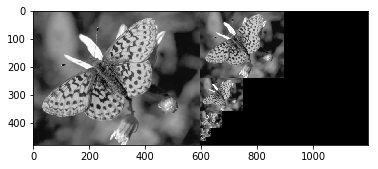

In [9]:
scale1 = scaled_images('butterfly.png')
scale1Pyramid = displayPyramid('butterfly.png', scale1)
plt.imsave('butterfly _pyramid_sf2.jpg', scale1Pyramid, cmap='gray') 

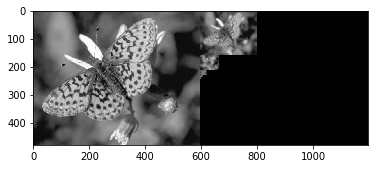

In [10]:
scale2 = scaled_images('butterfly.png', scale_factor=3, n_scales=10, sigma=5)
scale2Pyramid = displayPyramid('butterfly.png', scale2)
plt.imsave('butterfly_pyramid_sf3_sigma5.jpg', scale2Pyramid, cmap='gray') 

In [11]:
# 1c
# sobel function in scikit-image library
# butterfly _pyramid_edges.jpg

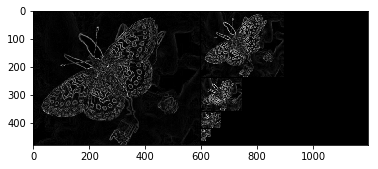

In [14]:
img = mpimg.imread('butterfly.png')
img = numpy.array(img) 
imgSob = sobel(img) 

imgListSob = []
imgListSob.append(imgSob) 
    
for i in range(1,len(scale1)):
    
    imgSob = sobel(scale1[i])
    imgListSob.append(imgSob)
    
sobPyramid = displayPyramid('butterfly.png', imgListSob) 
plt.imsave('butterfly _pyramid_edges.jpg', sobPyramid, cmap='gray') 

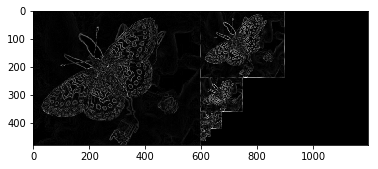

In [12]:
sobelX = ndimage.sobel(scale1, 0)  # horizontal derivative 
sobelY = ndimage.sobel(scale1, 1)  # vertical derivative 
sobelMag = numpy.hypot(sobelX, sobelY)  # magnitude 
sobelMag *= 255.0 / numpy.max(sobelMag)  # normalize (Q&D) 
plt.imshow(sobelMag, cmap='gray') 
#plt.imsave('butterfly _pyramid_edges.jpg', sobelMag, cmap='gray')  

In [15]:
# 1d
# resize function in scikit-image library
# Resized the resulting gradient magnitude images to match the size of input image
# butterfly_pyramid_edge{n}.jpg whre n is 0-4

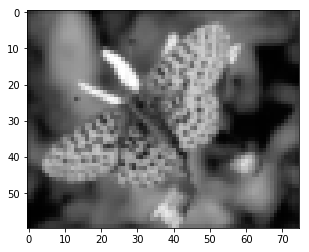

In [16]:
# resize = rescale(img, 3, anti_aliasing=False)
image_resized = resize(img, (scale1[3].shape[0] // 1, scale1[3].shape[1] // 1), anti_aliasing=True)
plt.imshow(image_resized, cmap='gray')

In [25]:
img = mpimg.imread('butterfly.png')
#img = numpy.array(img) 
imgRe = resize(img, (img.shape[0] , img.shape[1]), anti_aliasing=True)

imgListRe = []
imgListRe.append(imgRe) 
    
for i in range(1,len(scale1)):
    
    imgResize = resize(img, (imgListSob[i].shape[0], imgListSob[i].shape[1]), anti_aliasing=True)
    imgListRe.append(imgRe)
    
#sobPyramid = displayPyramid('butterfly.png', imgList) 
#plt.imsave('butterfly_pyramid_edge{n}.jpg', sobPyramid, cmap='gray') 

Text(0.5, 1.0, 'Sobel Edge Detection at Level 0')

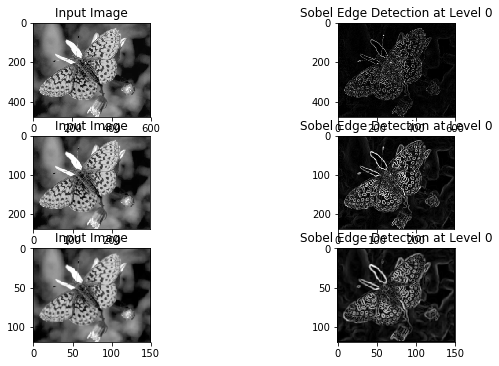

In [29]:
# idsplay comparisons 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
       
fig.add_subplot(5,2,1)
plt.imshow(scale1[0], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,2)
plt.imshow(imgListSob[0], cmap='gray')
plt.title('Sobel Edge Detection at Level 0', fontsize=12)

fig.add_subplot(5,2,3)
plt.imshow(scale1[1], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,4)
plt.imshow(imgListSob[1], cmap='gray')
plt.title('Sobel Edge Detection at Level 0', fontsize=12)

fig.add_subplot(5,2,5)
plt.imshow(scale1[2], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,6)
plt.imshow(imgListSob[2], cmap='gray')
plt.title('Sobel Edge Detection at Level 0', fontsize=12)

fig.add_subplot(5,2,7)
plt.imshow(scale1[2], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,8)
plt.imshow(imgListSob[2], cmap='gray')
plt.title('Sobel Edge Detection at Level 0', fontsize=12)

fig.add_subplot(5,2,9)
plt.imshow(scale1[2], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,10)
plt.imshow(imgListSob[2], cmap='gray')
plt.title('Sobel Edge Detection at Level 0', fontsize=12)

In [30]:
####   2   ####

In [15]:
# 2a

In [16]:
# Step 1: Compute derivatives of the input image in x- and y-direction --- sigma 1
# https://stackoverflow.com/questions/7185655/applying-the-sobel-filter-using-scipy
# Step 2: Construct the second moment matrix M in a Gaussian window around each pixel.
# Step 3: Compute the corner response function --- two options for computing corner response
# Step 4: Threshold the corner response value computed above --- set threshold = thresholding_factor * max_corner_response
# Step 5: Find local maxima of response function (non-maximum suppression)
# Step 6: Display resulting corners ---  show resulting corners as red dots on top of the input image as shown below

In [17]:
def corner_detection (image, *args, **kwargs):
    thresholding =  kwargs.get('thresholding', .1) # used for step 4
    minDist = kwargs.get('minDist', 10)  # used for step 5 minimum distance between corners used for non-maximum suppression
    responce = kwargs.get('responce', 1) # used for Step 3, implement two options for computing corner response:
                                         # (1) 𝑅 = det(𝑀) − 𝛼 ∗ 𝑡𝑟𝑎𝑐𝑒(𝑀) 2. (Set 𝛼 = 0.05 as default value.)
                                         # (2) 𝑅 = det(𝑀) / (𝑡𝑟𝑎𝑐𝑒(𝑀) + 10−6)
    
    # import image 
    img = mpimg.imread(image)
    
    return img

In [18]:
#2b
# apply to butterfly image

In [19]:
corner_detection ('butterfly.png')

array([[0.27058825, 0.27058825, 0.27058825, ..., 0.37254903, 0.38039216,
        0.38431373],
       [0.27058825, 0.27058825, 0.27058825, ..., 0.37254903, 0.38039216,
        0.38431373],
       [0.27058825, 0.27058825, 0.27058825, ..., 0.37254903, 0.38039216,
        0.38431373],
       ...,
       [0.05882353, 0.05882353, 0.05882353, ..., 0.1882353 , 0.1882353 ,
        0.1882353 ],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.19607843, 0.19607843,
        0.19607843],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.21176471, 0.21176471,
        0.21176471]], dtype=float32)

In [20]:
# 2c 
# apply to butterfly rotated image

In [21]:
# 2d
# apply to butterfly different sizes